# 1 - Introdução

#### Objetivo: Prever o risco de câncer cervical (câncer do colo de útero)
#### Modelo de Machine Learning utilizado: Regressão logística (modelo supervisionado e de classificação)

Este dataset da UCI contém uma lista de fatores de risco para câncer do colo do útero levando a um exame de biópsia!

Cerca de 11.000 novos casos de câncer cervical invasivo são diagnosticados a cada ano nos EUA. Embora seja o tipo de câncer mais evitável, a cada ano o câncer do colo do útero mata cerca de 4.000 mulheres nos EUA e cerca de 300.000 mulheres em todo o mundo. Nos Estados Unidos, as taxas de mortalidade por câncer do colo do útero caíram 74% entre 1955 e 1992, graças ao aumento da triagem e detecção precoce com o exame de Papanicolaou. A idade média do diagnóstico é de 48 anos. Cerca de 15% das mulheres desenvolvem câncer do colo do útero entre 20 e 30 anos. O câncer do colo do útero é extremamente raro em mulheres com menos de 20 anos. No entanto, muitas mulheres jovens são infectadas com vários tipos de vírus do papiloma humano, o que pode aumentar o risco de contrair câncer cervical no futuro. 

FATORES SOCIOECONÔMICOS E ÉTNICOS:
Embora a taxa de câncer do colo do útero tenha diminuído entre os caucasianos e mulheres afro-americanas nas últimas décadas, continua a ser muito mais prevalente em afro-americanos - cujas taxas de mortalidade são duas vezes mais altas que as mulheres caucasianas. As mulheres latino-americanas têm mais que o dobro do risco de câncer cervical invasivo que as mulheres caucasianas, também devido a uma menor taxa de triagem. Essas diferenças, no entanto, são quase certamente devidas a diferenças sociais e econômicas.  

ALTA ATIVIDADE SEXUAL: 
O vírus do papiloma humano (HPV) é o principal fator de risco para o câncer cervical. Em adultos, o fator de risco mais importante para o HPV é a atividade sexual com uma pessoa infectada. As mulheres com maior risco de câncer do colo do útero são aquelas com histórico de múltiplos parceiros sexuais, relações sexuais aos 17 anos ou menos, ou ambos. Uma mulher que nunca foi sexualmente ativa tem um risco muito baixo de desenvolver câncer cervical. A atividade sexual com múltiplos parceiros aumenta a probabilidade de muitas outras infecções sexualmente transmissíveis (clamídia, gonorréia, sífilis)

HISTÓRIA DA FAMÍLIA: 
As mulheres têm maior risco de câncer do colo do útero se tiverem um parente de primeiro grau (mãe, irmã) que tenha tido câncer do colo do útero. 

USO DE CONTRACEPTIVOS ORAIS: 
Estudos relataram uma forte associação entre câncer de colo uterino e uso prolongado de contracepção oral (CO). Mulheres que tomam pílulas anticoncepcionais por mais de 5 a 10 anos parecem ter um risco muito maior de infecção pelo HPV (até quatro vezes maior) do que aquelas que não usam COs.

TENDO MUITAS CRIANÇAS: 
Estudos indicam que ter muitos filhos aumenta o risco de desenvolver câncer do colo do útero, principalmente em mulheres infectadas pelo HPV. FUMO O tabagismo está associado a um maior risco de alterações pré-cancerosas (displasia) no colo do útero e na progressão para o câncer invasivo do colo do útero, principalmente em mulheres infectadas pelo HPV. 

IMUNOSSUPRESSÃO: As mulheres com sistemas imunológicos fracos (como aquelas com HIV / AIDS) são mais suscetíveis a adquirir o HPV. 

## 2 - Importando os pacotes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipy_table as tbl
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style ("whitegrid")

In [2]:
df = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

## 3 - Data wrangling

In [11]:
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


In [13]:
# convertendo o pandas para numérico
# ou df = df.convert_objects(convert_numeric=True)
df = df.apply(pd.to_numeric, errors='coerce')

In [14]:
# estatística descritiva
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

In [16]:
num_true = len(df.loc[df['Biopsy'] == True])
num_false = len(df.loc[df['Biopsy'] == False])
print("Casos de Biopsia positiva: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Casos de Biopsia negativa : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Casos de Biopsia positiva: 55 (6.41%)
Casos de Biopsia negativa : 803 (93.59%)


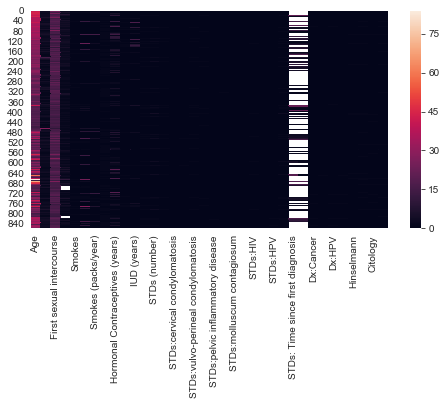

In [17]:
# detectando as missing values
plt.figure (figsize=(8,4))
sns.heatmap (df)

In [18]:
#substituindo os valores ? por NaN
data = df.replace('?', np.nan, inplace=True)
data=df
data.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [19]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [20]:
df.isnull().values.any()

True

In [21]:
# número de missing values por coluna
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [22]:
df.drop(["STDs: Time since first diagnosis","STDs: Time since last diagnosis"], axis=1, inplace= True )

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

In [24]:
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

### Substituindo as missing values das variáveis categóricas por 1 ou 0, e pela média as variáveis contínuas. 

In [25]:
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(0) 
df['IUD (years)'] = df['IUD (years)'].fillna(0) 
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())

In [26]:
df.mean()

Age                                   26.820513
Number of sexual partners              2.511655
First sexual intercourse              16.995338
Num of pregnancies                     2.257576
Smokes                                 0.158508
Smokes (years)                         1.201241
Smokes (packs/year)                    0.446278
Hormonal Contraceptives                0.686480
Hormonal Contraceptives (years)        2.035331
IUD                                    0.096737
IUD (years)                            0.444604
STDs                                   0.214452
STDs (number)                          0.155012
STDs:condylomatosis                    0.051282
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.004662
STDs:vulvo-perineal condylomatosis     0.050117
STDs:syphilis                          0.020979
STDs:pelvic inflammatory disease       0.001166
STDs:genital herpes                    0.001166
STDs:molluscum contagiosum             0

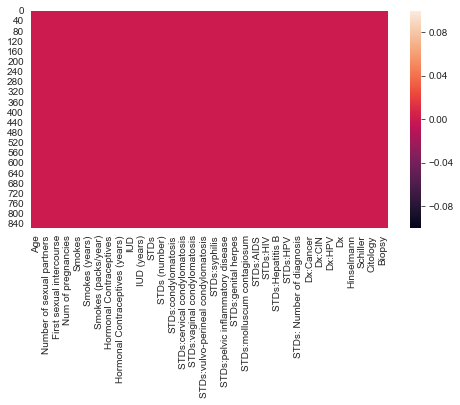

In [27]:
# verificando as missing values ocultas
plt.figure (figsize=(8,4))
sns.heatmap (df.isnull())

In [28]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [29]:
df.isnull().values.any()

False

In [30]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


## 4 - Data analysis

Text(0.5, 1.0, 'Idade')

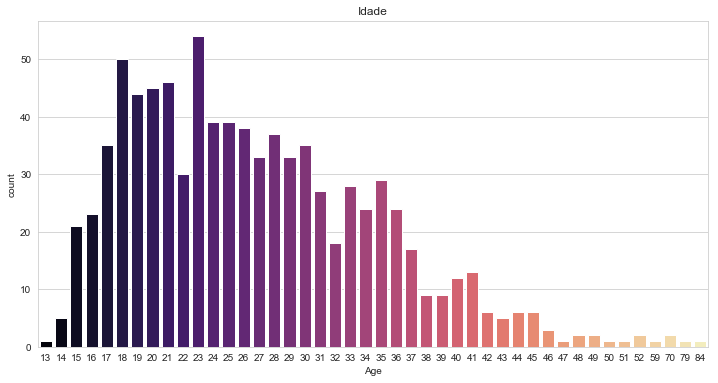

In [31]:
plt.figure (figsize=(12,6))
sns.countplot ("Age", data=df, palette="magma")
plt.title ("Idade")

Text(0.5, 1.0, 'Número de parceiros sexuais')

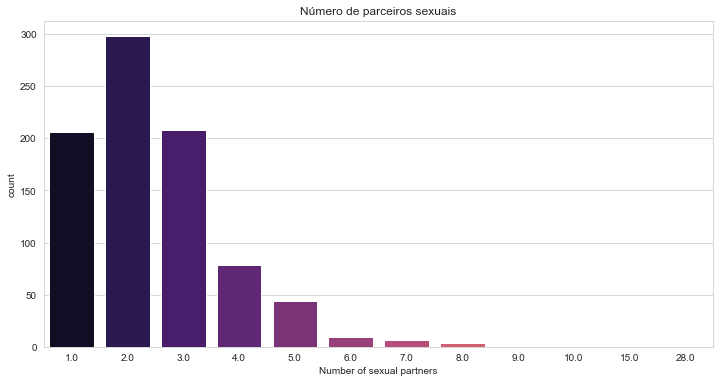

In [32]:
plt.figure (figsize=(12,6))
sns.countplot ("Number of sexual partners", data=df, palette="magma")
plt.title ("Número de parceiros sexuais")

Text(0.5, 1.0, 'Idade da primeira relação sexual')

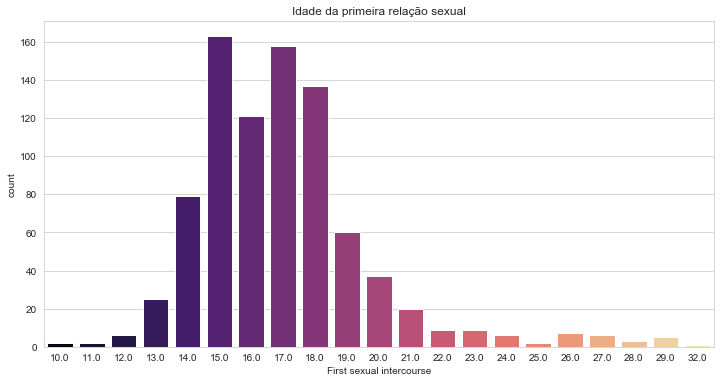

In [33]:
plt.figure (figsize=(12,6))
sns.countplot ("First sexual intercourse", data=df, palette="magma")
plt.title ("Idade da primeira relação sexual")

Text(0.5, 1.0, 'Quantidade de vezes que engravidou')

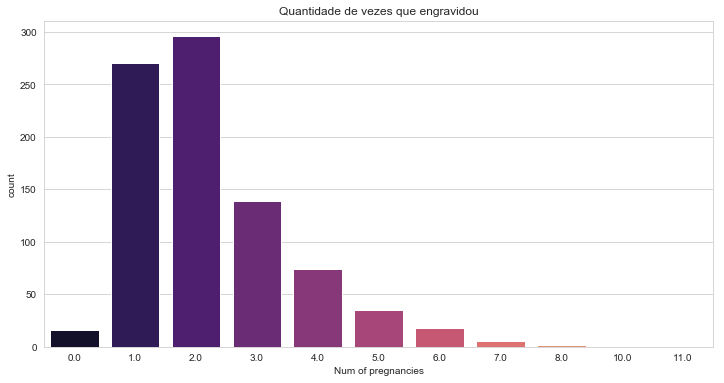

In [34]:
plt.figure (figsize=(12,6))
sns.countplot ("Num of pregnancies", data=df, palette="magma")
plt.title ("Quantidade de vezes que engravidou")

Text(0.5, 1.0, 'Contraceptivo hormonal')

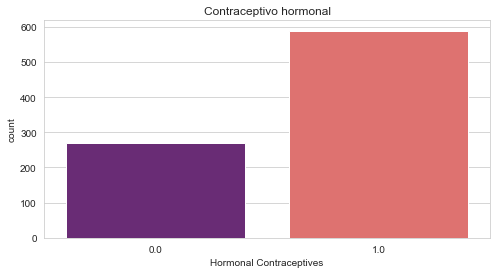

In [35]:
plt.figure (figsize=(8,4))
sns.countplot ("Hormonal Contraceptives", data=df, palette="magma")
plt.title ("Contraceptivo hormonal")

Text(0.5, 1.0, 'Fumantes')

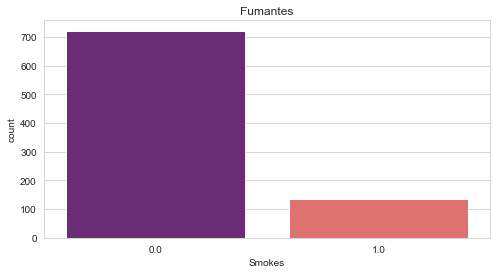

In [36]:
plt.figure (figsize=(8,4))
sns.countplot ("Smokes", data=df, palette="magma")
plt.title ("Fumantes")

Text(0.5, 1.0, 'Resultado da biopsia')

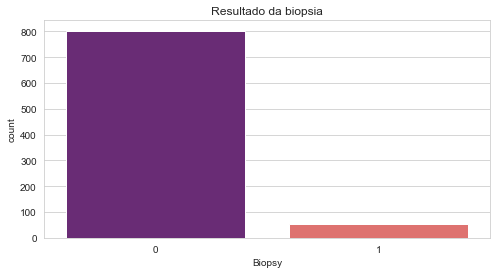

In [37]:
plt.figure (figsize=(8,4))
sns.countplot ("Biopsy", data=df, palette="magma")
plt.title ("Resultado da biopsia")

In [38]:
df["Biopsy"].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

Text(0.5, 1.0, 'Biopsia x número de parceiros sexuais')

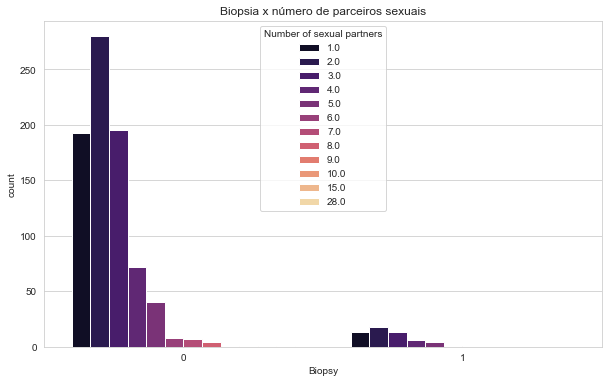

In [39]:
plt.figure (figsize=(10,6))
sns.countplot ("Biopsy", hue="Number of sexual partners", data=df, palette="magma")
plt.title ("Biopsia x número de parceiros sexuais")

Text(0.5, 1.0, 'Biopsia x uso de contraceptivos')

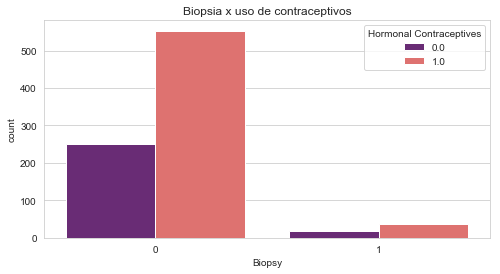

In [40]:
plt.figure (figsize=(8,4))
sns.countplot ("Biopsy", hue="Hormonal Contraceptives", data=df, palette="magma")
plt.title ("Biopsia x uso de contraceptivos")

Text(0.5, 1.0, 'Idade média por resultado da biopsia')

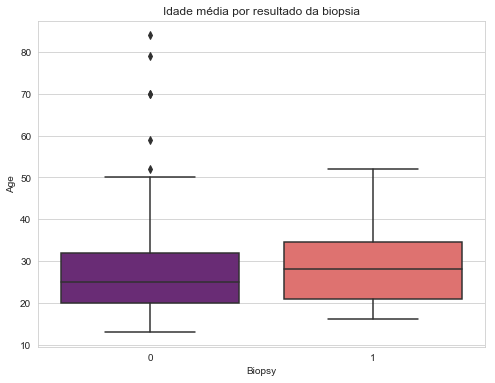

In [41]:
plt.figure (figsize=(8,6))
sns.boxplot (x="Biopsy", y="Age", data=df, palette="magma")
plt.title ("Idade média por resultado da biopsia")

### Separando as idades por grupos

In [42]:
df.isnull().values.any()

False

In [43]:
# Apenas para visualização. Essa coluna não entra no modelo preditivo
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70 ou mais']
df['age_group'] = pd.cut(df.Age, range(10, 85, 10),right=False, labels=age_labels)

Text(0.5, 1.0, 'Biopsia x faixa etária')

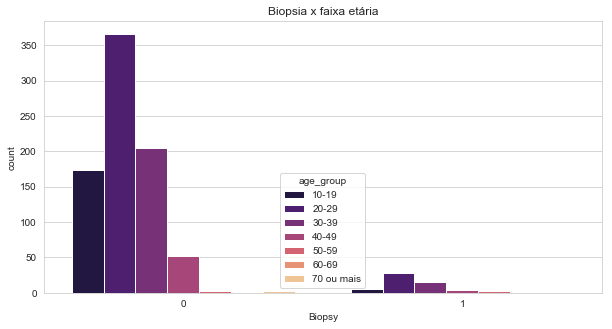

In [44]:
plt.figure (figsize=(10,5))
sns.countplot ("Biopsy", hue="age_group", data=df, palette="magma")
plt.title ("Biopsia x faixa etária")

In [45]:
table = pd.crosstab(df['Biopsy'],df['age_group'])
print (table)

age_group  10-19  20-29  30-39  40-49  50-59  70 ou mais
Biopsy                                                  
0            173    366    205     52      3           3
1              6     28     15      4      2           0


## 5 - Machine learning (Regressão logística)

Dividindo os dados para treino e teste

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology']]

y = (df["Biopsy"])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

Vendo como os dados estão distribuídos 

In [49]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['Biopsy'] == 1]), 
                                               (len(df.loc[df['Biopsy'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Biopsy'] == 0]), 
                                               (len(df.loc[df['Biopsy'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), 
                                               (len(y_train[y_train[:] == 1])/len(y_train) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), 
                                               (len(y_train[y_train[:] == 0])/len(y_train) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), 
                                               (len(y_test[y_test[:] == 1])/len(y_test) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), 
                                               (len(y_test[y_test[:] == 0])/len(y_test) * 100)))

Original True : 55 (6.41%)
Original False : 803 (93.59%)

Training True : 43 (6.69%)
Training False : 600 (93.31%)

Test True : 12 (5.58%)
Test False : 203 (94.42%)


Importando o modelo

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
reglog = LogisticRegression()
reglog.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Fazendo a predição 

In [52]:
prediction = reglog.predict (X_test)

In [53]:
from sklearn.metrics import classification_report

In [54]:
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       203
           1       0.69      0.75      0.72        12

   micro avg       0.97      0.97      0.97       215
   macro avg       0.84      0.87      0.85       215
weighted avg       0.97      0.97      0.97       215



Matriz confusão

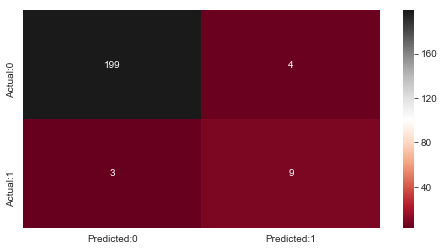

In [55]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,4))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="RdGy")

In [56]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

## 6 - Resultados

In [57]:
results = [
    ['The acuracy of the model = TP+TN/(TP+TN+FP+FN) = ', (TP+TN)/float(TP+TN+FP+FN)],
    ['The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN))],
    ['Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN)],
    ['Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP)],
    ['Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP)],
    ['Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN)],
    ['Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity)],
    ['Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/(specificity)],    
]
tbl.make_table(results)

The acuracy of the model = TP+TN/(TP+TN+FP+FN) =,0.9674
The Missclassification = 1-Accuracy =,0.0326
Sensitivity or True Positive Rate = TP/(TP+FN) =,0.7500
Specificity or True Negative Rate = TN/(TN+FP) =,0.9803
Positive Predictive value = TP/(TP+FP) =,0.6923
Negative predictive Value = TN/(TN+FN) =,0.9851
Positive Likelihood Ratio = Sensitivity/(1-Specificity) =,38.0625
Negative likelihood Ratio = (1-Sensitivity)/Specificity =,0.2550


### Visualizando a correlação entre as variáveis

Coeficiente de correlação:

+1  = forte correlação positiva

0   = não há correlação

-1  = forte correlação negativa

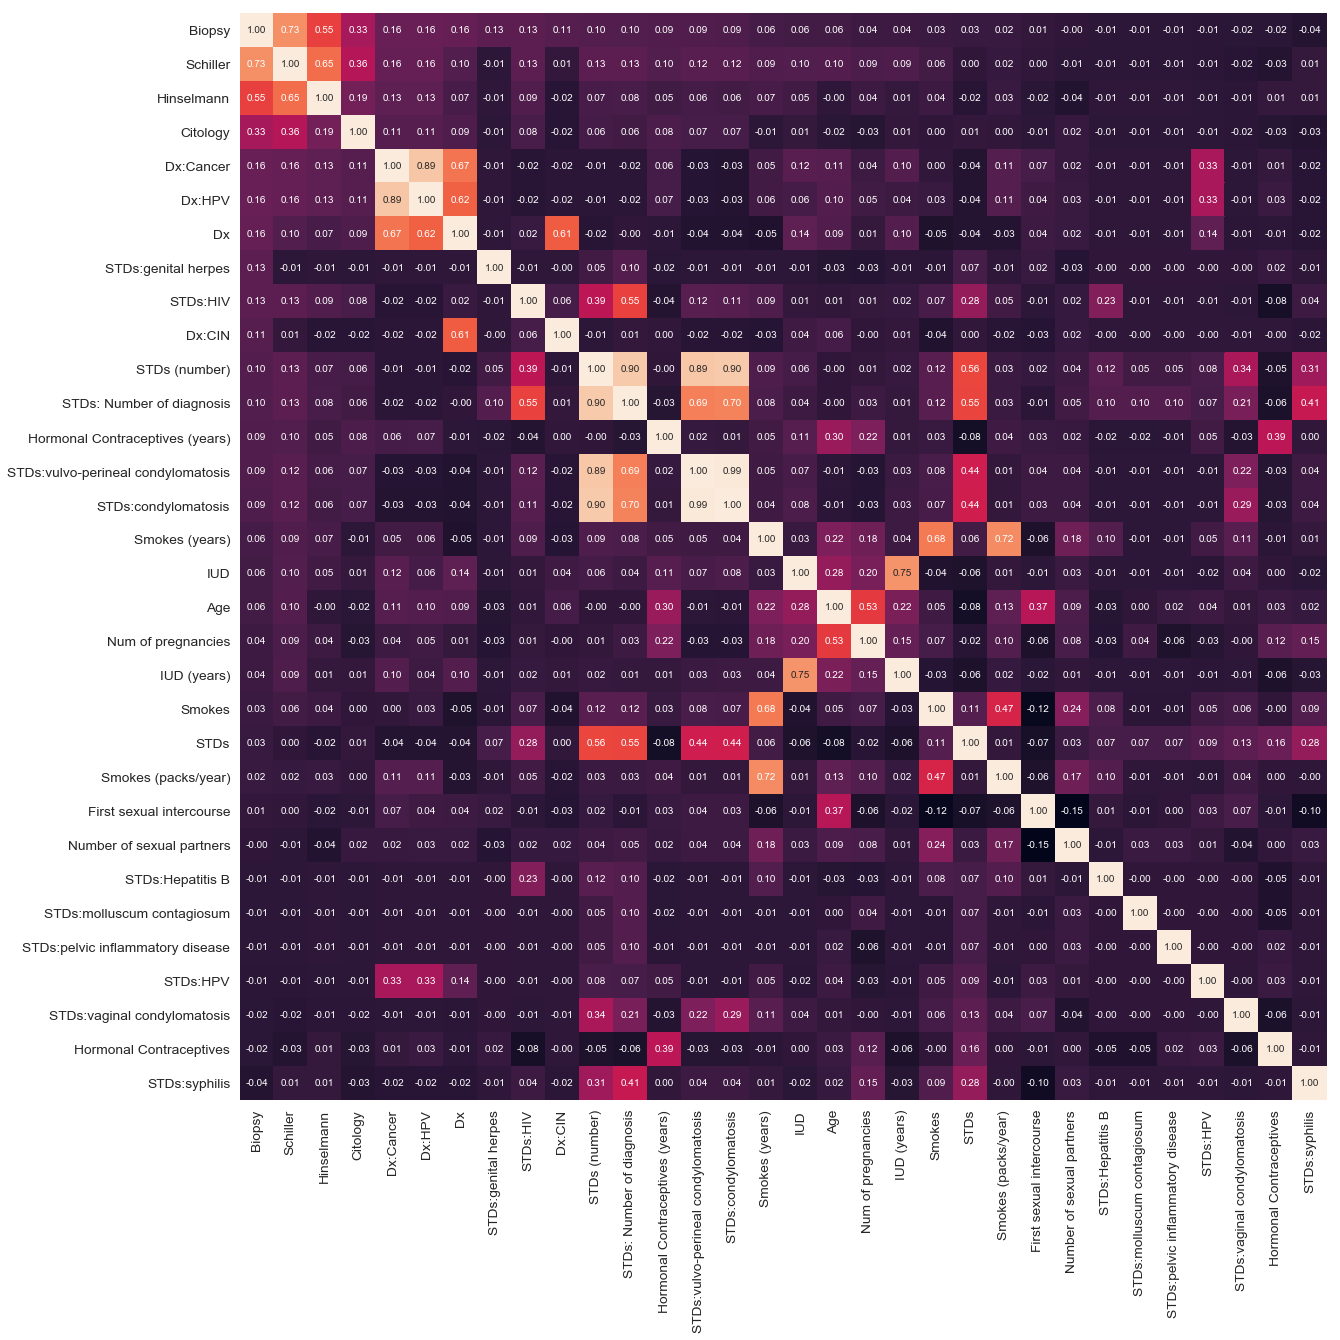

In [58]:
k = 34 #número de variáveis para o heatmap
corrmat = df.corr() #correlação
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(df[cols].values.T) #confusion matrix

plt.figure(figsize=(20,20))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

## 7 - Conclusão

- Resolvi deletar duas colunas (STDs: Time since first diagnosis e STDs: Time since last diagnosis), pois os valores 
faltantes em ambas eram de 787, tendo o dataset 858 entradas. A média poderia ser um valor muito tendensioso e impreciso. Ainda assim,
fiz o modelo preditivo utilizando a média nessas colunas para ver o resultado. Eles foram muito aproximados (em torno de 95%), tendo isso causado pouco impacto na predição,
mas o modelo melhorou (96,74) quando as colunas foram deletadas. Sendo assim das 36 colunas, foram utizadas 34. 

- Os valores da Biopsia positiva eram relativamente baixos, o que fez com que a Sensitividade tivesse uma acurácia 
consideravelmente menor do que a Especificidade. Os casos de Biopsia positiva foram 55 (6.41%) e de Biopsia negativa foram 803 (93.59%).

- Foi aplicado Naive Bayes e o Random Forest que tiveram uma acurácia inferior sendo o último um resultado aproximado de 94%.
O objetivo desse projeto era aplicar apenas um modelo de Regressão logística, mas o fiz com os outros modelos de classificação
apenas por curiosidade. De qualquer forma, a regressão logística obteve um resultado superior.

- Em relação a análise de dados, a maioria das pacientes são relativamente jovens para a faixa etária e média das mulheres que são diagnosticadas com câncer do colo de útero. Poderia ter sido com uma média de idade um pouco maior, o que daria maior precisão ao modelo no que se refere à sensitividade que foi de 75%, a qual é muito importante nesses casos de diagnóstico.

- O modelo preditivo teve 96,74% de acurácia, mas poderia ser muito melhor se tivesse um maior número de entradas. De qualquer forma é uma acurácia relativamente satisfatória.
